In [9]:
# Smart_grid.py
# Antonio, Mec, Vincent
# YakuzAI

from code.smart_grid import load_battery_data, load_house_data, show_district


#### Battery data

In [10]:
battery_data = ['Huizen&Batterijen/district_1/district-1_batteries.csv','Huizen&Batterijen/district_2/district-2_batteries.csv', 'Huizen&Batterijen/district_3/district-3_batteries.csv']

for battery in battery_data:
    print(load_battery_data(battery))

{(38, 12): 1507.0, (43, 13): 1507.0, (42, 3): 1507.0, (49, 23): 1507.0, (3, 45): 1507.0}
{(19, 20): 1508.25, (1, 36): 1508.25, (34, 49): 1508.25, (41, 21): 1508.25, (26, 22): 1508.25}
{(18, 34): 1506.75, (32, 11): 1506.75, (41, 1): 1506.75, (3, 35): 1506.75, (39, 41): 1506.75}


#### House data

In [11]:
houses_data = ['Huizen&Batterijen/district_1/district-1_houses.csv', 'Huizen&Batterijen/district_2/district-2_houses.csv', 'Huizen&Batterijen/district_3/district-3_houses.csv']

for house in houses_data:
    print(load_house_data(house))
    

{(34, 47): 53.97543253, (24, 22): 66.13020717, (49, 44): 39.82123377, (19, 38): 46.4333204, (22, 46): 62.43058175, (17, 11): 62.14055349, (19, 4): 52.43116675, (8, 6): 30.48448777, (9, 37): 63.19785578, (16, 38): 65.00367928, (20, 11): 40.20336825, (19, 12): 53.03976583, (33, 0): 39.13247939, (33, 7): 39.45690812, (21, 37): 53.84443114, (37, 28): 60.40913294, (2, 8): 27.78076375, (23, 48): 57.77286486, (28, 23): 38.72179636, (27, 22): 29.92408755, (47, 6): 41.78571625, (38, 22): 59.91115918, (47, 40): 71.42208448, (23, 1): 37.23961036, (18, 37): 70.21473166, (30, 37): 61.05026554, (4, 33): 38.13617191, (16, 48): 29.83002147, (12, 5): 74.15296092, (31, 41): 68.6532457, (50, 35): 54.25835415, (9, 48): 41.7880369, (22, 10): 72.88165705, (26, 30): 62.0133643, (15, 44): 53.08761347, (5, 15): 52.08494864, (21, 50): 38.71047582, (30, 12): 66.05341632, (21, 29): 45.33453242, (37, 23): 51.94608562, (27, 3): 57.11814462, (23, 10): 29.34726889, (13, 27): 37.28002017, (48, 4): 58.90934923, (20, 14

### Visualisatie

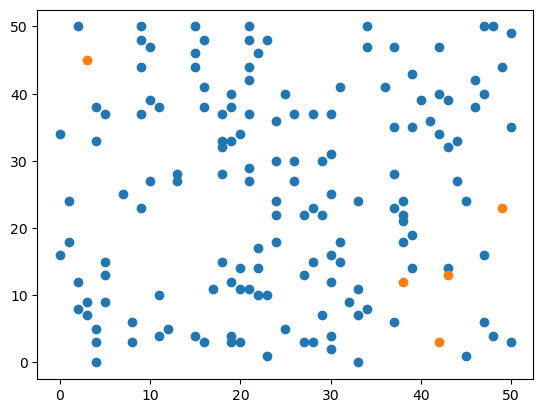

In [12]:
#plot
import matplotlib.pyplot as plt

#district 1
houses1 = load_house_data(houses_data[0])
batteries1 = load_battery_data(battery_data[0])

x1 = []
y1 = []

for house in houses1:
    x1.append(house[0])
    y1.append(house[1])

x2 = []
y2 = []

for battery in batteries1:
    x2.append(battery[0])
    y2.append(battery[1])

plt.scatter(x1, y1)
plt.scatter(x2, y2)
plt.show()

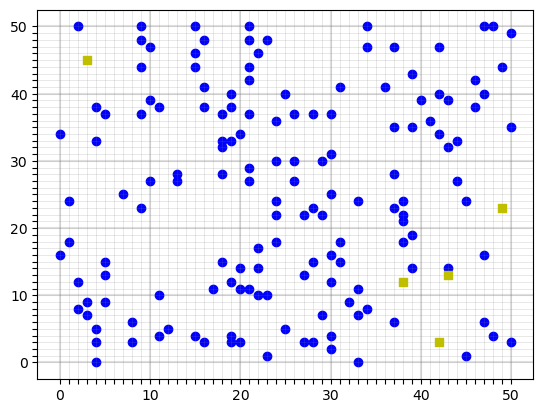

In [13]:
show_district(houses_data[0], battery_data[0])

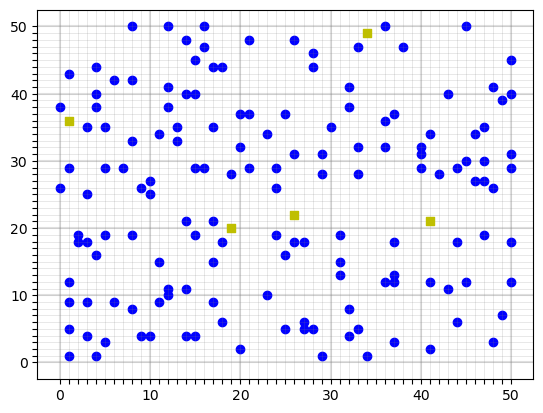

In [14]:
show_district(houses_data[1], battery_data[1])

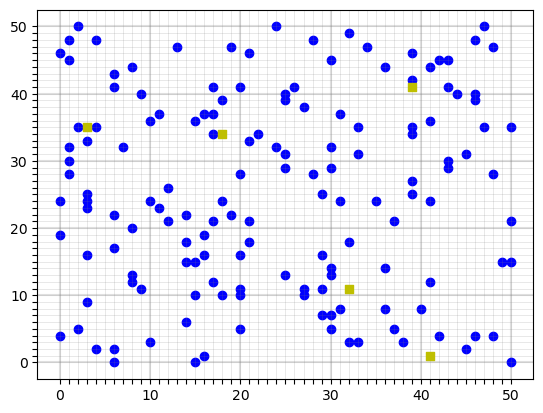

In [15]:
show_district(houses_data[2], battery_data[2])

In [16]:
import battery as Battery
import house as House

district1_houses = 'Huizen&Batterijen/district_1/district-1_houses.csv'

houses = []
houses_data = load_house_data(district1_houses)

for house in houses_data:
    houses.append(House(house[0], house[1], houses_data[house]))

for house in houses:
    print(house.x, house.y, house.maxoutput)


NameError: name 'House' is not defined

In [17]:
district1_batteries = 'Huizen&Batterijen/district_1/district-1_batteries.csv'

batteries = []
batteries_data = load_battery_data(district1_batteries)

for battery in batteries_data:
    batteries.append(Battery(battery[0], battery[1], batteries_data[battery]))

for battery in batteries:
    print(battery.x, battery.y, battery.capacity)



NameError: name 'Battery' is not defined

In [ ]:

import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#plot
district1_houses = 'Huizen&Batterijen/district_1/district-1_houses.csv'

houses = []
houses_data = load_house_data(district1_houses)

for house in houses_data:
    houses.append(House(house[0], house[1], houses_data[house]))

x1 = []
y1 = []

for house in houses:
    print(house.x, house.y, house.maxoutput)
    x1.append(house.x)
    y1.append(house.y)

x2 = []
y2 = []

for battery in batteries:
    x2.append(battery.x)
    y2.append(battery.y)

# Grid van 50 bij 50 met dunne lijnen
fig, ax = plt.subplots()
ax.set_xticks(np.arange(0, 51, 1))
ax.set_yticks(np.arange(0, 51, 1))

# Dun maken, in de achtergrond zetten en opaak maken
ax.grid(linestyle='-', linewidth='0.5', alpha=0.25, color='grey', zorder = 0)


# Iedere 10e lijn dikker maken, ook in achtergrond zetten en niet opaak maken
for i in range(0, 51, 10):
    ax.axvline(x=i, color='grey', linestyle='-', linewidth = 1.5, alpha=0.25, zorder = 0)
    ax.axhline(y=i, color='grey', linestyle='-', linewidth = 1.5, alpha = 0.25, zorder = 0)
    
# Alleen de 10e lijnen een label geven
ax.set_xticklabels([str(i) if i % 10 == 0 else '' for i in np.arange(0, 51, 1)])
ax.set_yticklabels([str(i) if i % 10 == 0 else '' for i in np.arange(0, 51, 1)])

# Huizen en batterijen plotten
ax.scatter(x1, y1, c='b', zorder = 1)
ax.scatter(x2, y2, c='y', marker='s', zorder = 2)

# Show de plot
plt.show()


: 

: 